In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clip
from wotan import flatten
from transitleastsquares import (
    transitleastsquares,
    cleaned_array,
    catalog_info,
    transit_mask
    )

In [2]:
# Load data
data = np.load('/data/jpr64/rebinned_data_test.npy', allow_pickle = True)

In [3]:

index = 4601
time = data[index][:,0]
flux = data[index][:,1]
flux_error = data[index][:,2]

In [4]:
# Cleaning of nan and negative values
time, flux = cleaned_array(time,flux)
# flux = sigma_clip(flux, sigma_lower = float('inf'), sigma_upper= 4 )
#

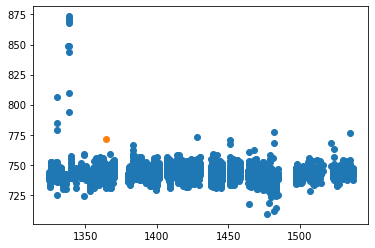

In [5]:
# Plotting original lc

plt.scatter(time, flux)
plt.scatter(time[500], np.nanmean(flux) + 4*np.std(flux))

In [6]:
# Detrending with Wotan
flatten_lc, trend_lc = flatten(time, flux, method='lowess', window_length = 0.125, return_trend=True)

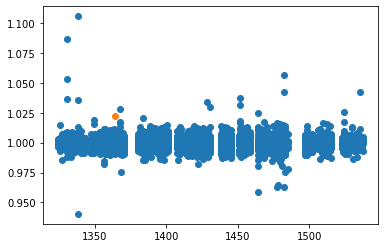

In [7]:
# Plotting detrended lc
plt.scatter(time, flatten_lc)
plt.scatter(time[500], np.nanmean(flatten_lc) + 4*np.nanstd(flatten_lc))


In [8]:
# Sigma clipping at 4
flatten_lc = sigma_clip(flatten_lc, sigma_lower = float('inf'), sigma_upper= 4)




In [9]:
# TLS search
model = transitleastsquares(time, flatten_lc, flux_error)
results = model.power()




/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/transitleastsquares/transit.py:157: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lc_arr = numpy.array(lc_arr)
  0%|          | 0/24641 periods | 00:00<?

Transit Least Squares TLS 1.0.26 (20 March 2021)
Creating model cache for 52 durations
Searching 4574 data points, 24641 periods from 0.602 to 106.328 days
Using all 64 CPU threads


100%|██████████| 24641/24641 periods | 00:42<00:00
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/transitleastsquares/stats.py:456: RuntimeWarning: divide by zero encountered in double_scalars
  snr_pink_per_transit[i] = (1 - mean_flux) / pinknoise


In [15]:
results

{'SDE': 25.41746834220464,
 'SDE_raw': 9.643039147662343,
 'chi2_min': 0.15325619542447658,
 'chi2red_min': 3.35352725217673e-05,
 'period': 53.89743391658167,
 'period_uncertainty': 0.024130717562119486,
 'T0': 1356.3769545628907,
 'duration': 0.005450155307575326,
 'depth': 0.9820848872828435,
 'depth_mean': (0.9902166270604751, 0.004498080069090907),
 'depth_mean_even': (0.9812623690810026, 0.0008639649781394097),
 'depth_mean_odd': (0.9991708850399474, 7.566891974337327e-05),
 'transit_depths': array([0.9824842 , 0.99917089, 0.98004054,        nan]),
 'transit_depths_uncertainties': array([0.00000000e+00, 7.56689197e-05, 0.00000000e+00,            nan]),
 'rp_rs': 0.12036962827059128,
 'snr': 4.221221293842377,
 'snr_per_transit': array([3.77876158, 0.25295849, 4.30594367, 0.        ]),
 'snr_pink_per_transit': array([inf, inf, inf,  0.]),
 'odd_even_mismatch': 19.05903565132861,
 'transit_times': [1356.3769545628907,
  1410.2743884794722,
  1464.1718223960538,
  1518.0692563126354

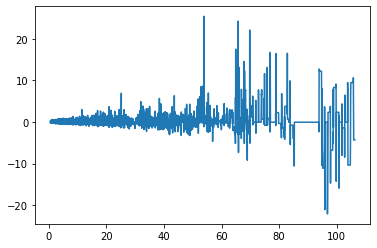

In [11]:
plt.plot(results.periods, results.power)


